In [1]:
import re

from operator import itemgetter

import spacy

from matplotlib.pyplot import figure
import networkx as nx
import pandas as pd

### Reading and preprocessing the data set of news articles

In [2]:
nlp = spacy.load("ru_core_news_lg")

In [3]:
df = pd.read_csv("news-dataset.csv")

In [4]:
def preprocess(text):
    pattern = r'\s{2,}|[,–:—;()«»<>+=\.\d]'
    text = re.sub(pattern, '', text)
    lemmas = [token.lemma_ for token in nlp(text)]
    persons = list(set([ent.text.title() for ent in nlp(" ".join(lemmas)).ents if ent.label_ == "PER" and "ниу вшэ" not in ent.text and " " in ent.text]))    
    return persons

In [5]:
df["PER"] = df["text"].apply(preprocess)

In [6]:
all_people = df["PER"].tolist()

In [7]:
articles = [article for article in all_people if article != []]

### Creating the Network Graph

In [8]:
G = nx.Graph() 

In [9]:
for entities in articles:
    G.add_nodes_from(entities)

In [10]:
for entities in articles:
    if len(entities) > 1:
        for i in range(len(entities)-1):
            G.add_edges_from([(str(entities[i]),str(entities[i+1]))])

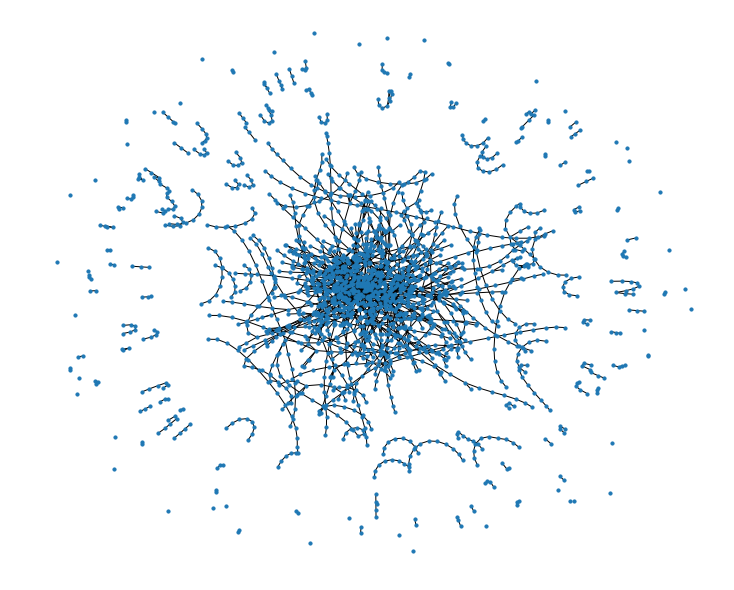

In [11]:
figure(figsize=(10, 8))
nx.draw(G, node_size=10)

In [12]:
max(dict(G.degree()).items(), key = lambda x : x[1])

('Ярослав Кузьминов', 62)

In [13]:
degree_dict = dict(G.degree(G.nodes()))
nx.set_node_attributes(G, degree_dict, 'degree')
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)

print("Top 10 mentioned people:")
for d in sorted_degree[:10]:
    print(d)

Top 10 mentioned people:
('Ярослав Кузьминов', 62)
('Ярослав Кузьминова', 26)
('Исак Фрумин', 16)
('Сергей Рощин', 14)
('Лилия Овчаров', 14)
('Алексей Иванов', 13)
('Владимир Путин', 13)
('Леонид Гохберг', 12)
('Исиэз Ниу', 11)
('Валерий Касамара', 11)
